In [1]:
import numpy as np
import pandas as pd
import glob
import sys,os

In [2]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
import json
import pickle
import re
from tqdm import tqdm
from pathlib import Path

### 0.API

In [5]:
id_standard_df = pd.read_csv('/nas/chenyi/datasets_nas/labelMap/standard/id2class99_chenyi.csv')
id_use_df = id_standard_df[id_standard_df['use']>=0]

In [6]:
# with open('/home/chenyi/workspace/myPyModule99/dataset/labelMap/standard/haowei34k_map_stand.json', 'r') as f:
#     hw2stand = json.load(f)

In [7]:
# with open('./data/haowei34k_map_stand.json', 'w') as f:
#     json.dump(hw2stand, f)

In [8]:
def get_list2dict(k_list, v_list):
    d = {}
    for item in zip(k_list, v_list):
        d[item[0]] = item[1]
    return d

In [9]:
def write_txt(input_list):
    label_path, text = input_list[0], input_list[1]
    with open(label_path, 'a+') as f:
        f.write(text)

In [11]:
l2_map_l1 = get_list2dict( id_use_df['label99'].values, id_use_df['label_l1'].values)

In [12]:
id2chi_l2 = get_list2dict(id_use_df['label2_chi'].values, id_use_df['label99'].values)

In [17]:
id2eng_l2 = get_list2dict(id_use_df['label99'].values, id_use_df['label2_eng'].values)

In [18]:
id2chi_l1 = get_list2dict(id_use_df['label_l1'].values, id_use_df['label1_chi'].values)

In [19]:
id2eng_l1 = get_list2dict(id_use_df['label_l1'].values, id_use_df['label1_eng'].values)

In [180]:
id2model_l1 = get_list2dict(model_label_map.values(), model_label_map.keys())

In [13]:
id2eng_df2 = {0:'short sleeve top', 1:  'long sleeve top',  2:'short sleeve outwear', 3:'long sleeve outwear', 4:'vest', 
              5:'sling',  6:'shorts',  7:'trousers',  
              8:'skirt',  
              9:'long sleeve dress', 10:'short sleeve dress',  11:'vest dress',  12:'sling dress'}
eng2id_df2 = get_list2dict(id2eng_df2.values(), id2eng_df2.keys())

In [10]:
model_label_map = {
    0: 10,  # 鞋子
    1: 8,  # 包包
    2: 4,  # 上装
    3: 5,  # 裤子
    4: 6,  # 裙子
    5: 7,  # 连体装
}

In [201]:
deep2model = {0:2, 1:2, 2:2, 3:2, 4:2,
             5:3, 6:3, 7:3,
             8:4,
             9:5, 10:5, 11:5, 12:5}

### 1.Dataset Information.

In [14]:
# clr_df.to_csv('/nas/chenyi/datasets_cls/dada_clr/shirt_cy_0602/skirt_bbox_clr_0602.csv', index=False)

In [42]:
p = '/nas/lichangjian/open_fashion/df_DeepFashion2.csv'

In [43]:
openfashion_pd = pd.read_csv(p)

In [53]:
openfashion_pd['label12'] = openfashion_pd['label'].map(eng2id_df2)
openfashion_pd['label12'] = openfashion_pd['label12'].astype(int)

In [55]:
df8 = openfashion_pd[openfashion_pd['label12']==8]
df8 = openfashion_pd[openfashion_pd['path'].isin(df8['path'])].copy(deep=True)

In [47]:
skirt_list = glob.glob('/nas/chenyi/datasets_cls/dada_clr/shirt_cy_0602/*/image/*/*.jpg')

In [48]:
skirt_df = pd.DataFrame()
skirt_df['path'] = skirt_list

In [58]:
df8.head(2)

,path,label,x_1,y_1,x_2,y_2,label12,stem,re_p
16,/nas/lichangjian/open_fashion/DeepFashion2/tra...,skirt,32,481,344,701,8,000013,train/image/000013.jpg
17,/nas/lichangjian/open_fashion/DeepFashion2/tra...,long sleeve top,50,120,440,590,1,000013,train/image/000013.jpg


In [50]:
skirt_df['stem'] = skirt_df['path'].apply(lambda x: Path(x).stem)

In [51]:
skirt_df['mode'] = skirt_df['path'].apply(lambda x: re.findall(r'/shirt_cy_0602/(.*?)/image/[0-9]{1,2}', x)[0])

In [52]:
skirt_df['re_p'] = skirt_df.apply(lambda row: '{0}/image/{1}.jpg'.format(row['mode'], row['stem']), axis=1)

In [56]:
df8['stem'] = df8['path'].apply(lambda x: Path(x).stem)

In [57]:
df8['re_p'] = df8['path'].apply(lambda x: re.findall(r'/DeepFashion2/(.*?/image/[0-9]{6}.jpg)', x)[0])

In [59]:
clr_df = df8[df8['re_p'].isin(skirt_df['re_p'])]

In [60]:
# cross_df = skirt_df[skirt_df['re_p'].isin(df8['re_p'])]

In [61]:
len(df8), len(clr_df), len(skirt_df), len(cross_df)

(73936, 37124, 9179, 4814, 4814)

In [134]:
clr_df.head()

,path,label,x_1,y_1,x_2,y_2,label12,stem,re_p,width,height
1504,/nas/lichangjian/open_fashion/DeepFashion2/tra...,skirt,138,409,330,575,8,000936,train/image/000936.jpg,468,705
1505,/nas/lichangjian/open_fashion/DeepFashion2/tra...,long sleeve outwear,29,188,417,704,3,000936,train/image/000936.jpg,468,705
1636,/nas/lichangjian/open_fashion/DeepFashion2/tra...,skirt,70,480,405,623,8,001014,train/image/001014.jpg,468,624
1637,/nas/lichangjian/open_fashion/DeepFashion2/tra...,short sleeve top,0,10,466,550,0,001014,train/image/001014.jpg,468,624
2587,/nas/lichangjian/open_fashion/DeepFashion2/tra...,skirt,258,637,457,728,8,001575,train/image/001575.jpg,750,729


##### 图片大小

In [135]:
df8 = clr_df
df8.head(2).values

array([['/nas/lichangjian/open_fashion/DeepFashion2/train/image/000936.jpg',
        'skirt', 138, 409, 330, 575, 8, '000936',
        'train/image/000936.jpg', 468, 705],
       ['/nas/lichangjian/open_fashion/DeepFashion2/train/image/000936.jpg',
        'long sleeve outwear', 29, 188, 417, 704, 3, '000936',
        'train/image/000936.jpg', 468, 705]], dtype=object)

In [66]:
h_list = []
w_list = []
for p in tqdm(df8['path'].values):
    img = Image.open(p)
    w,h = img.size
    h_list.append(h)
    w_list.append(w)

100%|███████████████████████████████████████████████████████████████████████████| 9179/9179 [00:04<00:00, 2038.26it/s]


In [67]:
df8['width'] = w_list
df8['height'] = h_list

In [69]:
# df8.to_csv('./data/skirt_df2.csv', index=False)

### 2.统计数据集

In [ ]:
df8 = openfashion_pd[(openfashion_pd['label12']>=8) & (openfashion_pd['label12']<=8)]

In [ ]:
df_skirt = openfashion_pd[openfashion_pd['path'].isin(df8['path'])]

In [ ]:
len(df_skirt), len(openfashion_pd), len(df_skirt.drop_duplicates('path'))

In [ ]:
df = df_skirt[(df_skirt['label12']>=9) & (df_skirt['label12']<=12)]

In [ ]:
df.value_counts('label')

In [ ]:
df.value_counts('label').values.sum()/len(df_skirt.drop_duplicates('path'))

In [ ]:
gp = df_skirt.groupby('path')

In [ ]:
gp_dict = dict(list(gp))

In [ ]:
gp_dict[list(gp_dict.keys())[200]].values

#### 二级标签

In [ ]:
openfashion_pd.head(2)

In [ ]:
openfashion_pd[openfashion_pd['label8']==5].value_counts('label43')

In [ ]:
counter = openfashion_pd.value_counts('label_num').sort_index()

In [ ]:
id_list = np.array(counter.axes)[0]
numbers = counter.values
name_list = [str(x) + ':' + str(id2eng_l2[hw2stand[str(x)][0]]) for x in id_list]

In [ ]:
plt.figure(figsize=(25, 7))
plt.xticks(list(range(len(name_list))), name_list, rotation=75, fontsize=14)
plt.bar(name_list, numbers, width=0.5)  # 绘制y刻度标签
for a, b in zip(name_list, numbers):
    plt.text(a, b, b, ha='center', va='bottom')
plt.show()

#### 一级标签

In [ ]:
df = openfashion_pd

In [ ]:
counter = df.value_counts('label')

In [ ]:
id_list = np.array(counter.axes)[0]
numbers = counter.values
# name_list = [str(x) + ':' + id2eng_l1[model_label_map[x]] for x in id_list]
name_list = counter.index

In [ ]:
plt.figure(figsize=(25, 7))
plt.xticks(list(range(len(name_list))), name_list, rotation=75, fontsize=14)
plt.bar(name_list, numbers, width=0.5)  # 绘制y刻度标签
for a, b in zip(name_list, numbers):
    plt.text(a, b, b, ha='center', va='bottom')
plt.show()

In [ ]:
!ls /nas/chenyi/dataset_apparel_nas/

In [ ]:
hw_data_p = '/nas/chenyi/dataset_apparel_nas/haowei34k_conf7.csv'

In [ ]:
hw_data_df = pd.read_csv(hw_data_p)

In [ ]:
hw_data_df.head()

In [ ]:
counter_hw = hw_data_df['label_2'].value_counts()

In [ ]:
id_list = np.array(counter_hw.axes)[0]
numbers = counter_hw.values
name_list = [str(x) + ':' + names[x][1] for x in id_list]

In [ ]:
plt.figure(figsize=(25, 7))
plt.xticks(list(range(len(name_list))), name_list, rotation=50, fontsize=14)
plt.bar(name_list, numbers, width=0.5)  # 绘制y刻度标签
for a, b in zip(name_list, numbers):
    plt.text(a, b, b, ha='center', va='bottom')
plt.show()

### target label

#### 直接读dataframe

In [372]:
slink_df = pd.read_csv('./data/skirt_slink.csv')

In [472]:
# slink_df.to_csv('./data/skirt_slink.csv', index=False)

In [471]:
slink_df.tail(2).values

array([[32131,
        '/home/chenyi/workspace/dataset/labels/dada_det/labels100k_skirt_df2/validation/032131.txt',
        '/home/chenyi/workspace/yolov5/datasets/dadet100kv1/labels/val/032131.txt',
        '/home/chenyi/workspace/yolov5/datasets/dadet100kv1/images/val/032131.jpg',
        '/home/chenyi/workspace/dataset/data/DeepFashion2/validation/image/032131.jpg',
        'val'],
       [32132,
        '/home/chenyi/workspace/dataset/labels/dada_det/labels100k_skirt_df2/validation/032132.txt',
        '/home/chenyi/workspace/yolov5/datasets/dadet100kv1/labels/val/032132.txt',
        '/home/chenyi/workspace/yolov5/datasets/dadet100kv1/images/val/032132.jpg',
        '/home/chenyi/workspace/dataset/data/DeepFashion2/validation/image/032132.jpg',
        'val']], dtype=object)

In [374]:
len(slink_df)

4814

In [377]:
slink_df.tail(2)

,stem,label_sp,label_tp,img_tp,img_sp,mode
4812,32131,/home/chenyi/workspace/dataset/labels/dada_det...,/home/chenyi/workspace/yolov5/datasets/dadet10...,/home/chenyi/workspace/yolov5/datasets/dadet10...,/home/chenyi/workspace/dataset/data/DeepFashio...,train
4813,32132,/home/chenyi/workspace/dataset/labels/dada_det...,/home/chenyi/workspace/yolov5/datasets/dadet10...,/home/chenyi/workspace/yolov5/datasets/dadet10...,/home/chenyi/workspace/dataset/data/DeepFashio...,train


#### Target label path

In [30]:
!tree -d -L 1 /home/chenyi/workspace/dataset/validation_all/skirt8k_df2

/home/chenyi/workspace/dataset/validation_all/skirt8k_df2
├── images
└── labels8

2 directories


In [85]:
!tree -d -L 1 /home/chenyi/workspace/dataset/labels/dada_det/labels100k_skirt_df2/

/home/chenyi/workspace/dataset/labels/dada_det/labels100k_skirt_df2/
├── train
└── validation

2 directories


In [77]:
# !tree -d -L 2 /home/chenyi/workspace/yolov5/datasets/validation_all/

/home/chenyi/workspace/yolov5/datasets/validation_all/
└── skirt8k_df2
    ├── images
    └── labels

3 directories


In [475]:
df = pd.read_csv('./data/skirt_df2.csv')
# df.to_csv('./data/skirt_df2.csv', index=False)

In [476]:
# df['mode'] = df['path'].apply(lambda x:re.findall(r'DeepFashion2/(.*?)/image', str(x))[0])

In [477]:
df.tail(2).values

array([['/nas/lichangjian/open_fashion/DeepFashion2/validation/image/032132.jpg',
        'skirt', 91, 116, 584, 587, 8, 32132,
        'validation/image/032132.jpg', 640, 960, 4, 'validation',
        '/home/chenyi/workspace/dataset/labels/dada_det/labels100k_skirt_df2/validation/032132.txt'],
       ['/nas/lichangjian/open_fashion/DeepFashion2/validation/image/032132.jpg',
        'long sleeve top', 84, 0, 638, 295, 1, 32132,
        'validation/image/032132.jpg', 640, 960, 2, 'validation',
        '/home/chenyi/workspace/dataset/labels/dada_det/labels100k_skirt_df2/validation/032132.txt']],
      dtype=object)

In [478]:
df.head(2)

,path,label,x_1,y_1,x_2,y_2,label12,stem,re_p,width,height,label_model,mode,label_tp
0,/nas/lichangjian/open_fashion/DeepFashion2/tra...,skirt,138,409,330,575,8,936,train/image/000936.jpg,468,705,4,train,/home/chenyi/workspace/dataset/labels/dada_det...
1,/nas/lichangjian/open_fashion/DeepFashion2/tra...,long sleeve outwear,29,188,417,704,3,936,train/image/000936.jpg,468,705,2,train,/home/chenyi/workspace/dataset/labels/dada_det...


In [142]:
# root = '/home/chenyi/workspace/dataset/validation_all/skirt8k_df2/labels8/'
root = '/home/chenyi/workspace/dataset/labels/dada_det/labels100k_skirt_df2/'

In [143]:
df['path'] = df['path'].apply(lambda x: Path(x))

In [469]:
# df['label_tp'] = df.apply(lambda row: Path('{0}/val/{1}.txt'.format(root, row['path'].stem)), axis=1)
df['label_tp'] = df.apply(lambda row: Path('{0}/{1}/{2}.txt'.format(root, row['mode'], Path(row['path']).stem)), axis=1)

#### 生成txt

In [388]:
sys.path.append('../../')

In [389]:
from utils.bbox.conversation import bbox_coco2voc, bbox_voc2yolo, bbox_yolo2voc

In [479]:
df = pd.read_csv('./data/skirt_df2.csv')

In [480]:
# df['label_model'] = df['label12'].map(deep2model)
# df.to_csv('./data/skirt_df2.csv', index=False)

In [481]:
df.head(2)

,path,label,x_1,y_1,x_2,y_2,label12,stem,re_p,width,height,label_model,mode,label_tp
0,/nas/lichangjian/open_fashion/DeepFashion2/tra...,skirt,138,409,330,575,8,936,train/image/000936.jpg,468,705,4,train,/home/chenyi/workspace/dataset/labels/dada_det...
1,/nas/lichangjian/open_fashion/DeepFashion2/tra...,long sleeve outwear,29,188,417,704,3,936,train/image/000936.jpg,468,705,2,train,/home/chenyi/workspace/dataset/labels/dada_det...


In [482]:
df_test = df

In [483]:
bboxes_list = []
for ind,row in tqdm(df_test.iterrows()):
    bbox7 = row.loc[['label_model', 'x_1', 'y_1', 'x_2', 'y_2', 'width', 'height']].values.tolist()
    bbox5 = bbox7[:6]
    bbox5[1:] = bbox_voc2yolo(bbox5[1:], bbox7[5], bbox7[6])
    bbox5_str = '{0:.0f} {1:.6f} {2:.6f} {3:.6f} {4:.6f}\n'.format(*bbox5)
    bboxes_list.append(bbox5_str)
    # break

9179it [00:03, 2571.53it/s]


In [485]:
def write_txt(label_path, text):
    # label_path, text = input_list[0], input_list[1]
    label_path = Path(label_path)
    p_parent = label_path.parent
    if not p_parent.is_dir():
        p_parent.mkdir()
    if not p_parent.is_file():
        with open(label_path, 'a+') as f:
            f.write(text)

In [486]:
# troot = Path('/home/chenyi/workspace/dataset/validation_all/skirt8k_df2/labels8/')
troot = Path('/home/chenyi/workspace/dataset/labels/dada_det/labels100k_skirt_df2/')

In [487]:
import shutil
if troot.is_dir():
    shutil.rmtree(troot)
troot.mkdir(parents=True)
for label_path, text in tqdm(zip(df['label_tp'].values, bboxes_list)):
    write_txt(label_path, text)
    # break

9179it [00:00, 20630.14it/s]


In [488]:
label_path

'/home/chenyi/workspace/dataset/labels/dada_det/labels100k_skirt_df2/validation/032132.txt'

In [489]:
!cat $label_path

4 0.527344 0.366146 0.770312 0.490625
2 0.564063 0.153646 0.865625 0.307292


#### 生成所有path

In [111]:
!tree -d -L 2 /home/chenyi/workspace/yolov5/datasets/validation_all/
!tree -d -L 2 /home/chenyi/workspace/yolov5/datasets/dadet100kv1/

/home/chenyi/workspace/yolov5/datasets/validation_all/
└── skirt8k_df2
    ├── images
    └── labels

3 directories
/home/chenyi/workspace/yolov5/datasets/dadet100kv1/
├── images
│   ├── train
│   └── val
└── labels
    ├── train
    └── val

6 directories


In [490]:
slink_df = pd.read_csv('./data/skirt_slink.csv')

In [491]:
# slink_df.to_csv('./data/skirt_slink.csv', index=False)

In [492]:
slink_df.head(2).values

array([[936,
        '/home/chenyi/workspace/dataset/labels/dada_det/labels100k_skirt_df2/train/000936.txt',
        '/home/chenyi/workspace/yolov5/datasets/dadet100kv1/labels/train/000936.txt',
        '/home/chenyi/workspace/yolov5/datasets/dadet100kv1/images/train/000936.jpg',
        '/home/chenyi/workspace/dataset/data/DeepFashion2/train/image/000936.jpg',
        'train'],
       [1014,
        '/home/chenyi/workspace/dataset/labels/dada_det/labels100k_skirt_df2/train/001014.txt',
        '/home/chenyi/workspace/yolov5/datasets/dadet100kv1/labels/train/001014.txt',
        '/home/chenyi/workspace/yolov5/datasets/dadet100kv1/images/train/001014.jpg',
        '/home/chenyi/workspace/dataset/data/DeepFashion2/train/image/001014.jpg',
        'train']], dtype=object)

In [493]:
slink_df.tail(2)

,stem,label_sp,label_tp,img_tp,img_sp,mode
4812,32131,/home/chenyi/workspace/dataset/labels/dada_det...,/home/chenyi/workspace/yolov5/datasets/dadet10...,/home/chenyi/workspace/yolov5/datasets/dadet10...,/home/chenyi/workspace/dataset/data/DeepFashio...,val
4813,32132,/home/chenyi/workspace/dataset/labels/dada_det...,/home/chenyi/workspace/yolov5/datasets/dadet10...,/home/chenyi/workspace/yolov5/datasets/dadet10...,/home/chenyi/workspace/dataset/data/DeepFashio...,val


In [494]:
# slink_df['mode'] = slink_df['label_sp'].apply(lambda x: re.findall('/labels100k_skirt_df2/(.*?)/', x)[0])

In [397]:
slink_df['label_tp'] = slink_df.apply(lambda x: '/home/chenyi/workspace/yolov5/datasets/dadet100kv1/labels/{0}/{1}'.format(x['mode'], Path(x['label_tp']).name), axis=1)

In [399]:
slink_df['img_tp'] = slink_df.apply(lambda x: '/home/chenyi/workspace/yolov5/datasets/dadet100kv1/images/{0}/{1}'.format(x['mode'], Path(x['img_tp']).name), axis=1)

In [495]:
slink_df.value_counts('mode')

mode
train    3123
val      1691
dtype: int64

##### 标准路径生成

In [256]:
drop_df = df.drop_duplicates('label_tp')

In [257]:
slink_df = pd.DataFrame()
slink_df['stem'] = drop_df['path'].apply(lambda x: Path(x).stem)
slink_df['img_sp'] = drop_df['path']
slink_df['label_sp'] = drop_df['label_tp']

In [258]:
root = Path('/home/chenyi/workspace/yolov5/datasets/dadet100kv1/')
# root = Path('/home/chenyi/workspace/yolov5/datasets/validation_all/skirt8k_df2/')
troot = Path('/home/chenyi/workspace/dataset/data/DeepFashion2/')

In [259]:
# slink_df['label_tp'] = slink_df['label_sp'].apply(lambda x: root /'labels' /x.parts[-2]/x.parts[-1])
# slink_df['label_tp'] = drop_df.apply(lambda x: root /'labels' / x['mode'] /x['label_tp'].name, axis=1)
slink_df['label_tp'] = slink_df.apply(lambda x: root /'labels' / x['label_sp'].parts[-2] /x['label_sp'].name, axis=1)

In [260]:
slink_df['img_tp'] = slink_df['label_tp'].apply(lambda x: root /'images' /x.parts[-2]/x.parts[-1])
slink_df['img_tp'] = slink_df['img_tp'].apply(lambda x: x.with_suffix('.jpg'))

In [261]:
# slink_df['img_sp'] = slink_df['image_tpath'].apply(lambda x: troot /'images' /x.parts[-2]/x.parts[-1])
slink_df['img_sp'] = slink_df['img_sp'].apply(lambda x: str(x).replace('/nas/lichangjian/open_fashion/DeepFashion2', str(troot)))

In [262]:
slink_df.head(2).values

array([['000936',
        '/home/chenyi/workspace/dataset/data/DeepFashion2/train/image/000936.jpg',
        PosixPath('/home/chenyi/workspace/dataset/labels/dada_det/labels100k_skirt_df2/train/000936.txt'),
        PosixPath('/home/chenyi/workspace/yolov5/datasets/dadet100kv1/labels/train/000936.txt'),
        PosixPath('/home/chenyi/workspace/yolov5/datasets/dadet100kv1/images/train/000936.jpg')],
       ['001014',
        '/home/chenyi/workspace/dataset/data/DeepFashion2/train/image/001014.jpg',
        PosixPath('/home/chenyi/workspace/dataset/labels/dada_det/labels100k_skirt_df2/train/001014.txt'),
        PosixPath('/home/chenyi/workspace/yolov5/datasets/dadet100kv1/labels/train/001014.txt'),
        PosixPath('/home/chenyi/workspace/yolov5/datasets/dadet100kv1/images/train/001014.jpg')]],
      dtype=object)

In [ ]:
# slink_df.to_csv('data/skirt_slink.csv', index=False)

#### 生成sym link

In [511]:
root = '/home/chenyi/workspace/yolov5/datasets/validation_all/skirt8k_df2/'
root = '/home/chenyi/workspace/yolov5/datasets/dadet100kv1/'
!tree  -d -L 2 $root

/home/chenyi/workspace/yolov5/datasets/dadet100kv1/
├── images
│   ├── train
│   └── val
└── labels
    ├── train
    └── val

6 directories


In [512]:
slink_df = pd.read_csv('./data/skirt_slink.csv')

In [513]:
slink_df.tail(2).values

array([[32131,
        '/home/chenyi/workspace/dataset/labels/dada_det/labels100k_skirt_df2/validation/032131.txt',
        '/home/chenyi/workspace/yolov5/datasets/dadet100kv1/labels/val/032131.txt',
        '/home/chenyi/workspace/yolov5/datasets/dadet100kv1/images/val/032131.jpg',
        '/home/chenyi/workspace/dataset/data/DeepFashion2/validation/image/032131.jpg',
        'val'],
       [32132,
        '/home/chenyi/workspace/dataset/labels/dada_det/labels100k_skirt_df2/validation/032132.txt',
        '/home/chenyi/workspace/yolov5/datasets/dadet100kv1/labels/val/032132.txt',
        '/home/chenyi/workspace/yolov5/datasets/dadet100kv1/images/val/032132.jpg',
        '/home/chenyi/workspace/dataset/data/DeepFashion2/validation/image/032132.jpg',
        'val']], dtype=object)

In [514]:
slink_df.tail(2)

,stem,label_sp,label_tp,img_tp,img_sp,mode
4812,32131,/home/chenyi/workspace/dataset/labels/dada_det...,/home/chenyi/workspace/yolov5/datasets/dadet10...,/home/chenyi/workspace/yolov5/datasets/dadet10...,/home/chenyi/workspace/dataset/data/DeepFashio...,val
4813,32132,/home/chenyi/workspace/dataset/labels/dada_det...,/home/chenyi/workspace/yolov5/datasets/dadet10...,/home/chenyi/workspace/yolov5/datasets/dadet10...,/home/chenyi/workspace/dataset/data/DeepFashio...,val


In [520]:
len(glob.glob(f'{root}images/*/*.jpg')), len(glob.glob(f'{root}labels/*/*.txt'))

(4814, 4814)

In [499]:
# %%time
# for p in tqdm(glob.glob(f'{root}images/*/*.jpg')+glob.glob(f'{root}labels/*/*.txt')):
#     if Path(p).is_file():
#         Path(p).unlink()

0it [00:00, ?it/s]

CPU times: user 1.29 ms, sys: 258 µs, total: 1.55 ms
Wall time: 1.25 ms


In [510]:
%%time
for p in slink_df['img_tp'].values:
    if Path(p).is_file():
        Path(p).unlink()
_ = slink_df.apply(lambda row: Path.symlink_to(Path(row['img_tp']), Path(row['img_sp'])), axis=1)

CPU times: user 133 ms, sys: 82 ms, total: 215 ms
Wall time: 218 ms


In [516]:
%%time
for p in slink_df['label_tp'].values:
    if Path(p).is_file():
        Path(p).unlink()
_ = slink_df.apply(lambda row: Path.symlink_to(Path(row['label_tp']), Path(row['label_sp'])), axis=1)
# _ = slink_df.apply(lambda row: os.symlink(str(row['label_sp']), str(row['label_tp'])), axis=1)

CPU times: user 169 ms, sys: 85 ms, total: 254 ms
Wall time: 272 ms


In [517]:
len(glob.glob(f'{root}images/*/*.jpg')), len(glob.glob(f'{root}labels/*/*.txt'))

(4814, 4814)

In [518]:
p = str(slink_df['label_tp'][0])
!cat $p

4 0.500000 0.697872 0.410256 0.235461
2 0.476496 0.632624 0.829060 0.731915


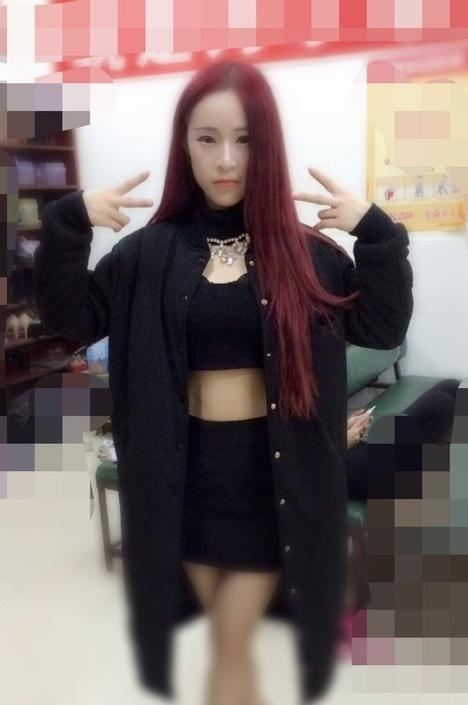

In [519]:
Image.open(slink_df['img_tp'][0])

### 数据拷贝

In [ ]:
sys.path.append('../../utils/data/')
from transferData import run_task_multithread,copy_data, copy_data_mkdir
import shutil

def copy_data_mkdir(plist, mode='copy'):
    ps = Path(plist[0])
    pt = Path(plist[1])
    if not pt.parent.is_dir():
        pt.parent.mkdir(parents=True, exist_ok=True)
    if not pt.is_file():
        shutil.copyfile(ps, pt)

In [ ]:
df8.reset_index(inplace=True)

In [ ]:
df8.head(2)

In [ ]:
df8['folder'] = ''

In [ ]:
df8['spath'] = df8['path'].apply(lambda x: str(int(Path(x).stem)//2**8))

In [ ]:
df8['folder'] = df8['path'].apply(lambda x: str(int(Path(x).stem)//2**8))

In [ ]:
!mkdir -p '/home/chenyi/workspace/dataset_clr/deepfashion2_drawed'

In [ ]:
root = '/home/chenyi/workspace/dataset_clr/deepfashion2_drawed/'

In [ ]:
df8['spath'] = df8['path'].apply(lambda x: str(x).replace('/nas/lichangjian/open_fashion/DeepFashion2/', '/nas/lichangjian/open_fashion_20220527/DeepFashion2/'))

In [ ]:
df8.head(2).values

In [ ]:
df8['tpath'] = df8.apply(lambda row: '{0}{1}/image/{2}/{3}'.format(root, row['path'].parts[-3], row['folder'], row['path'].name), axis=1)

In [ ]:
len(df8), len(df8.drop_duplicates('path'))

In [ ]:
input_list = list(zip(df8['spath'].values.tolist(), df8['tpath'].values.tolist()))
input_list = [list(item) for item in input_list]

In [ ]:
input_list[0]

In [ ]:
%%time
run_task_multithread(input_list, func=copy_data_mkdir, thread_num = 20)